In [1]:
import numpy as np
import recycle as re
import matplotlib.pyplot as plt
from scipy.linalg import svdvals

In [2]:
import matplotlib.colors as mcolors

# Your specific colors
color_list = ['#0283F8', '#FFA500','#00C49A', '#FF0059']
# Create a ListedColormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomColormap", color_list)

colors = {
    "red":'#FF0059',
    "blue":'#0283F8',
    "green":'#00C49A',
    "orange":'#FFA500',
    "purple":'#5751d0'
}

In [3]:
fx = np.loadtxt("data/enso/enso_idealised_kappa-1.65_anoms.txt")
x = np.arange(len(fx))

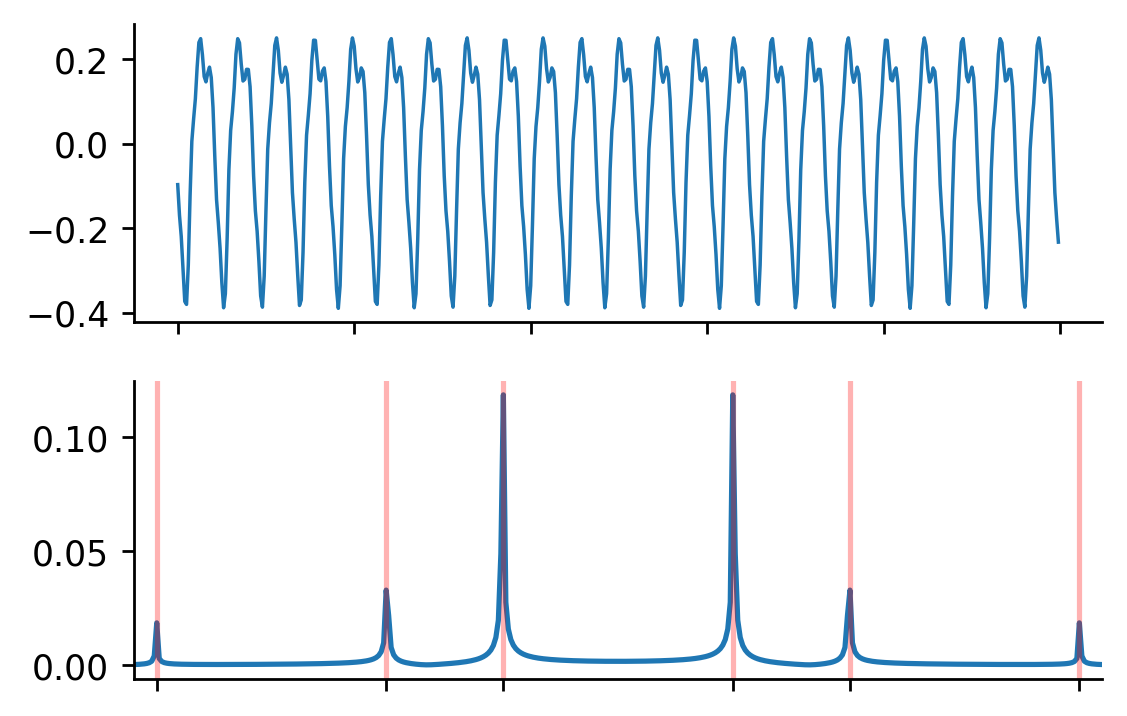

In [6]:
mosaic = """
A
B
"""

freqs, coefs, peaks = re.timeseries.find_frequency_peaks(
    fx, x, min_height=0.005, distance=10, width=1
)
fig, ax = plt.subplot_mosaic(mosaic, figsize=(5, 3.4), dpi=250)
ax["A"].plot(x[:50000][::100], fx[:50000][::100],linewidth=1)
ax["A"].spines[["top","right"]].set_visible(False)
ax["A"].set_xticklabels([])
re.timeseries.plot_frequency_peaks(freqs, coefs, peaks, ax["B"])
support = np.abs(freqs[np.abs(coefs)>0.005])
ax['B'].set_xticks(freqs[peaks],[""]*len(freqs[peaks])) #dont show numbers
ax['B'].set_xlim(-np.max(support)*1.05,np.max(support)*1.05)
#plt.savefig("Figures/example_enso165_signal.png",bbox_inches='tight')
plt.show()

# delays
rate = len(fx)/np.max(x)
delays = np.arange(1,400)
average_orth = [re.timeseries.gamma_value(tau, freqs[peaks]) for tau in delays]
min_delay = delays[np.argmin(average_orth)]
delay = int(min_delay // rate)


vandermond = re.timeseries.omega_matrix(min_delay, freqs[peaks])
sigma = svdvals(vandermond)
f_approx = re.timeseries.reconstruct_signal(coefs, peaks)
diff = np.abs(fx - f_approx)
lower_bound = np.sqrt(3) * np.max(np.abs(coefs[peaks])) * np.min(sigma) - np.sqrt(
    np.sum(peaks) + 1
) * np.max(diff)

# embedding
embedding = re.timeseries.time_delay_embedding(fx, dimension=np.sum(peaks), delay=delay)
bad_embedding = re.timeseries.time_delay_embedding(fx, dimension=np.sum(peaks), delay=10)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.tri import Triangulation
import utils
from importlib import reload
utils = reload(utils)

def higher_embedding_plot(embedding, ax,cycles = None,cmap=None,view=(20,20),grid=True):
    # Clear any existing content on the axis
    ax.clear()
    # Ensure it's a 3D axis
    if not hasattr(ax, 'get_zlim'):
        raise ValueError("Axis must be a 3D axis")
    # Perform PCA
    pca = PCA(n_components=3).fit_transform(embedding)
    # Scatter plot
    ax.plot(pca[:,0], pca[:,1], pca[:,2], alpha=1,linewidth=0.5,linestyle="--")
    #ax.scatter(pca[:,0], pca[:,1], pca[:,2],marker='.',s=1,alpha=0.9)
    ax.view_init(*view)
    
    # Remove tick labels
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.set_ticklabels([])
    if cycles:
        for color,min_cycle in zip(cmap,cycles):
            for edge in list(min_cycle):
                ax.plot(*zip(pca[edge[0]], pca[edge[1]]), "-", color=colors[color], alpha=0.9,linewidth=2,marker='.',markersize=1,zorder=2)
    # Set axis limits
    ax.grid(grid)
    ax.set_xlim(-0.35,0.35);ax.set_ylim(-0.35,0.35);ax.set_zlim(-0.35,0.35)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = 1000, verbose=True)


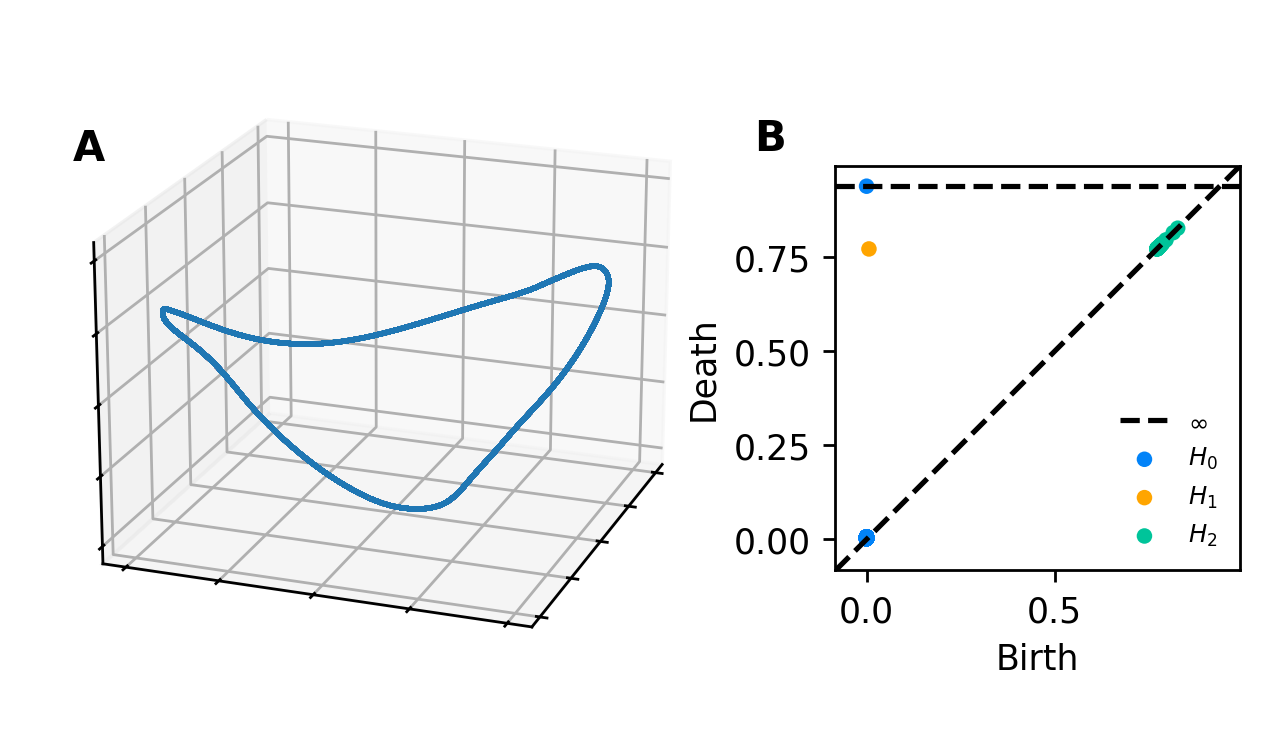

In [102]:
from ripser import Rips
# Create figure with 3D subplots
fig = plt.figure(figsize=(6.2, 6.2),dpi=250)

# Create 3D subplots
gs = fig.add_gridspec(
    1, 2, 
    height_ratios=[1],  # Top row 3x taller than bottom row
    width_ratios=[1.7, 1],   # Equal column widths
    wspace=0.2,            # Adjust column spacing (0.3 is default)
    hspace=0)


ax_A = fig.add_subplot(gs[0, 0], projection='3d')

# Plot embeddings
higher_embedding_plot(embedding, ax_A)
ax_A.text2D(0.05, 0.85, 'A', transform=ax_A.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")

MAXDIM = 2
N_PERM = 1000
rips = Rips(maxdim = MAXDIM, n_perm=N_PERM)
diags=rips.fit_transform(embedding)
ax = fig.add_subplot(gs[0, 1])
utils.plot_diagrams(diags,color_list,legend=True,ax = ax)
ax.text(-0.2, 1.12, 'B', transform=ax.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")
plt.savefig("Figures/example_enso165_embedding.png",bbox_inches='tight')
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = 1000, verbose=True)


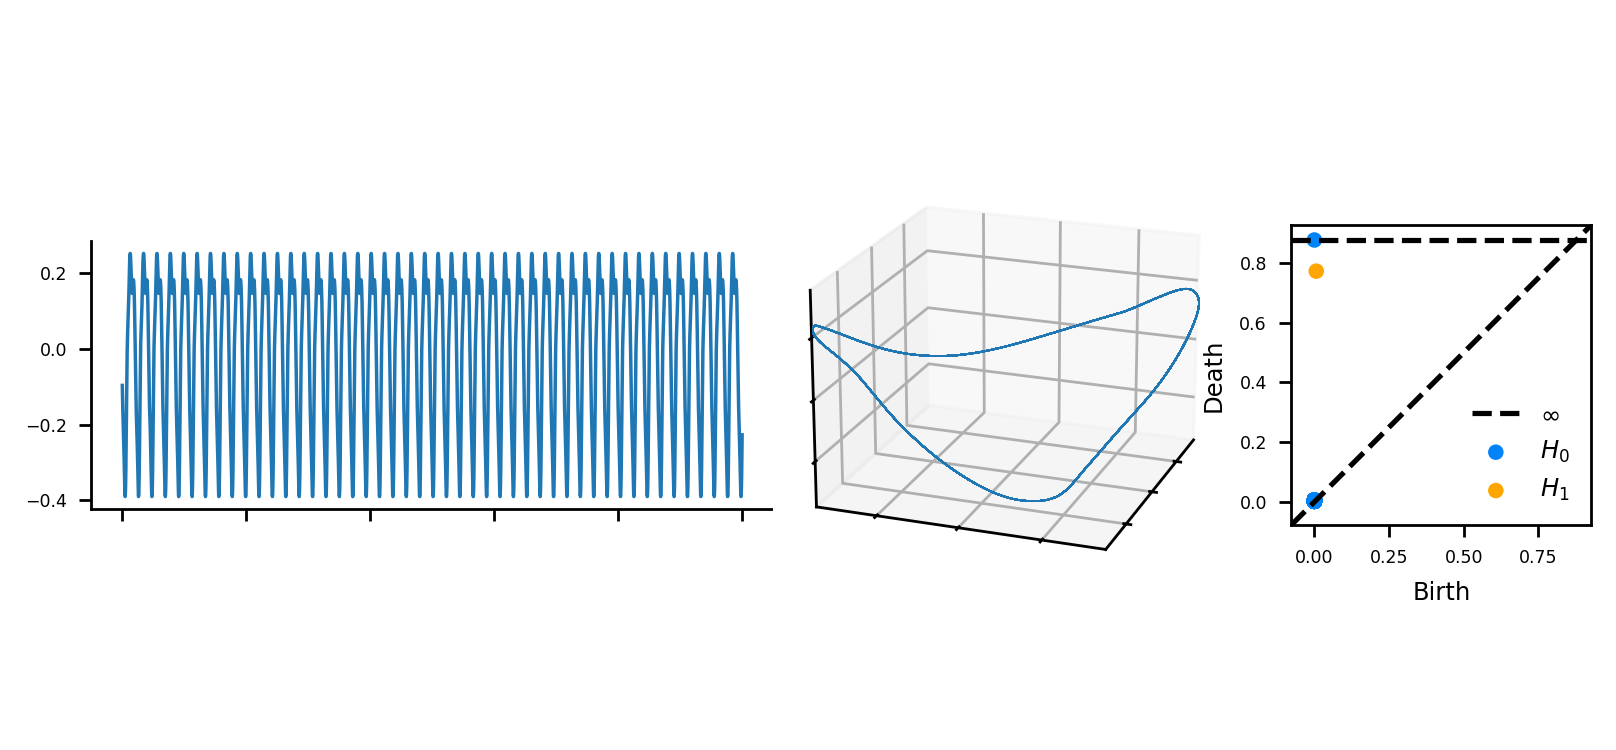

In [11]:
# Create figure with 3D subplots
from ripser import Rips
fig = plt.figure(figsize=(6, 2.8),dpi=250)

# Create 3D subplots
gs = fig.add_gridspec(
    3, 4, 
    height_ratios=[0.8,1,0.8],  # Top row 3x taller than bottom row
    width_ratios=[2.5,1.7,0.2,1.1],   # Equal column widths
    wspace=0,            # Adjust column spacing (0.3 is default)
    hspace=0.01)
ax = fig.add_subplot(gs[0, 0])
ax.axis("off")
ax = fig.add_subplot(gs[-1, 0])
ax.axis("off")
ax = fig.add_subplot(gs[1, 0])
ax.tick_params(axis='both', which='major', labelsize=5)
ax.plot(x, fx,linewidth=1)
ax.spines[["top","right"]].set_visible(False)
ax.set_xticklabels([])
#ax.text(0.02, 1.3, 'A', transform=ax.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")

ax_A = fig.add_subplot(gs[:, 1], projection='3d')
higher_embedding_plot(embedding, ax_A)
#ax_A.text2D(0, 0.82, 'B', transform=ax_A.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")

MAXDIM = 1
rips = Rips(maxdim = MAXDIM,n_perm = 1000)
diags=rips.fit_transform(embedding)

ax = fig.add_subplot(gs[:, 3])
utils.plot_diagrams(diags,color_list,legend=True,ax = ax)
b_values = np.linspace(-10, 5, 15)
d_values = b_values + lower_bound
#ax.plot(b_values, d_values, linestyle="-", color="red",alpha=0.4)
ax.tick_params(axis='both', which='major', labelsize=5)
#ax.text(-0.2, 1.02, 'C', transform=ax.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("Figures/example_enso165_embedding_flat.png",bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [10]:
def boundary_and_representative(points,max_edge_length,slack_factor = 1):
    dimension = 2
    #max_edge_length = death * 1.01  # give a bit of slack
    assert slack_factor <= 1
    
    gudhi_complex = re.core.create_simplicial_complex(points, max_edge_length, dimension)
    (
        representative,
        boundary_map,
        reduced_boundary_base,
        (birth_simplex,death_simplex)
    ) = re.core.get_representative_and_complex(gudhi_complex, dimension)
    
    # Get the actual values of birth and death
    birth,death = gudhi_complex.filtration(birth_simplex),gudhi_complex.filtration(death_simplex)
    min_persistence = (death - birth) * slack_factor
    
    order_function = lambda s: (gudhi_complex.filtration(s), s)
    # ISOLATED
    np1_simplices = sorted(
        {
            simplex
            for simplex in reduced_boundary_base
            if gudhi_complex.filtration(simplex) <= (death - min_persistence)*1.01 #slack for rounding errors
        },
        key=order_function,
    )
    n_simplices = sorted(
        {
            tuple(sorted(simplex))
            for simplex, radius in gudhi_complex.get_filtration()
            if len(simplex) == dimension and radius <= (death - min_persistence)*1.01 #slack for rounding errors
        },
        key=order_function,
    )
    nm1_simplices = sorted(
        {
            tuple(sorted(simplex))
            for simplex, radius in gudhi_complex.get_filtration()
            if len(simplex) == dimension - 1 and radius <= (death - min_persistence)*1.01 #slack for rounding errors
        },
        key=order_function,
    )
            
    x_orig = re.core.lift_representative(representative, nm1_simplices, n_simplices)
    boundary_matrix = re.core.build_boundary_matrix(n_simplices, np1_simplices)
    return boundary_matrix, x_orig, n_simplices, representative, (birth_simplex,death_simplex)

In [11]:
#get representative
dimension = 2
persistence = diags[1][:, 1] - diags[1][:, 0]
cycles = np.argmax(persistence)
birth, death = diags[1][cycles]
#subsample
points = embedding[:50000][::50]

max_edge_length = death * 1.01  # give a bit of slack
boundary_matrix,x_orig,n_simplices,_,_ = boundary_and_representative(points,
                                                                     max_edge_length,
                                                                     slack_factor=1)#0.7 for the relaxed plot

In [12]:
def optimize_cycle(W, x_orig, boundary_matrix, n_simplices):
    # Run optimization
    x_min, status, objective_value = re.core.find_minimal_homologous_cycle(
        boundary_matrix, x_orig, W, use_gurobi=True
    )
    min_cycle = set(
        [n_simplices[index] for index in np.argwhere(~np.isclose(x_min, 0)).flatten()]
    )  # be carefull here with values close to zero, add a tolerance parameter
    return min_cycle

def time_adjacency_matrix(norm=np.mean):
    def inner_time_adjacency_matrix(simplex_j, simplex_i):
        if are_simplices_adjacent(simplex_j, simplex_i):
            return time_weight(simplex_i, simplex_j,norm=norm)
        else:
            return 0

    return inner_time_adjacency_matrix


def time_label(simplex_i,norm):
    return norm(simplex_i)

def time_weight(simp1, simp2,norm) -> float:
    return np.abs(time_label(simp1,norm=norm) - time_label(simp2,norm=norm))


def are_simplices_adjacent(simplex1, simplex2):
    # Count common elements between the two tuples
    common_elements = set(simplex1).intersection(set(simplex2))
    # Two simplices are adjacent if they share exactly n-1 elements
    if len(common_elements) == len(simplex1) - 1:
        return 1
    return 0

def local_time_difference(
    inv_row_map,
) -> np.ndarray:
    n = len(inv_row_map)
    weight_matrix = np.zeros((n, n))

    for i in range(n):
      simplex_i = inv_row_map[i]
      weight_matrix[i,i] = np.abs(simplex_i[0]-simplex_i[1])
    return weight_matrix

W_local = local_time_difference(n_simplices)
local_cycle = optimize_cycle(W_local, x_orig, boundary_matrix, n_simplices)
W_mean = re.core.create_weight_matrix(n_simplices, time_adjacency_matrix(np.mean))
mean_cycle = optimize_cycle(W_mean, x_orig, boundary_matrix, n_simplices)

Set parameter Username
Set parameter LogFile to value "gurobi.log"
Using license file /Users/antonio/gurobi.lic
Academic license - for non-commercial use only - expires 2025-10-30

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.1.0 24B91)
Copyright (c) 2024, Gurobi Optimization, LLC

Read LP format model from file /var/folders/n0/wk41mth910n6jkj_vdp1m4z00000gn/T/3c248a65684e41ed9fbfc47882387229-pulp.lp
Reading time = 0.01 seconds
OBJ: 6477 rows, 18431 columns, 29385 nonzeros

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6477 rows, 18431 columns and 29385 nonzeros
Model fingerprint: 0xfafd8149
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 9e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4931 rows and 4931 columns
Presolve time: 0.02s
Presolved: 1546 rows, 13500 columns, 27028 nonzeros

Iteration    Objec

In [13]:
def invert_subsample(tuple_list,subsample, sample):
    # Create a mapping of point values to their original indexes in embedding
    sample_map={i : int(np.isclose(sample,point).all(axis=1).nonzero()[0][0]) for i,point in enumerate(subsample)}
    # Map each tuple to embedding indexes
    embedding_tuples = [
        (sample_map[i], sample_map[j])
        for (i, j) in tuple_list
    ]
    return embedding_tuples


def plot_selection(x,fx,cycle,color,ax):
    vertex_set = {item for tup in cycle for item in tup}
    for vertex in vertex_set:
        plt.axvline(x[vertex], color=color, alpha=0.6,linewidth=1)
    
    ax.plot(x, fx,alpha=0.8,color="gray")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=5)
    plt.scatter(x[list(vertex_set)],fx[list(vertex_set)],color=color,s=20,edgecolors="white",linewidths=1,zorder=2)
    ax.set_xticklabels([])

In [117]:
simplex_cycle = invert_subsample(mean_cycle,points,embedding)
vertex_cycle = invert_subsample(local_cycle,points,embedding)

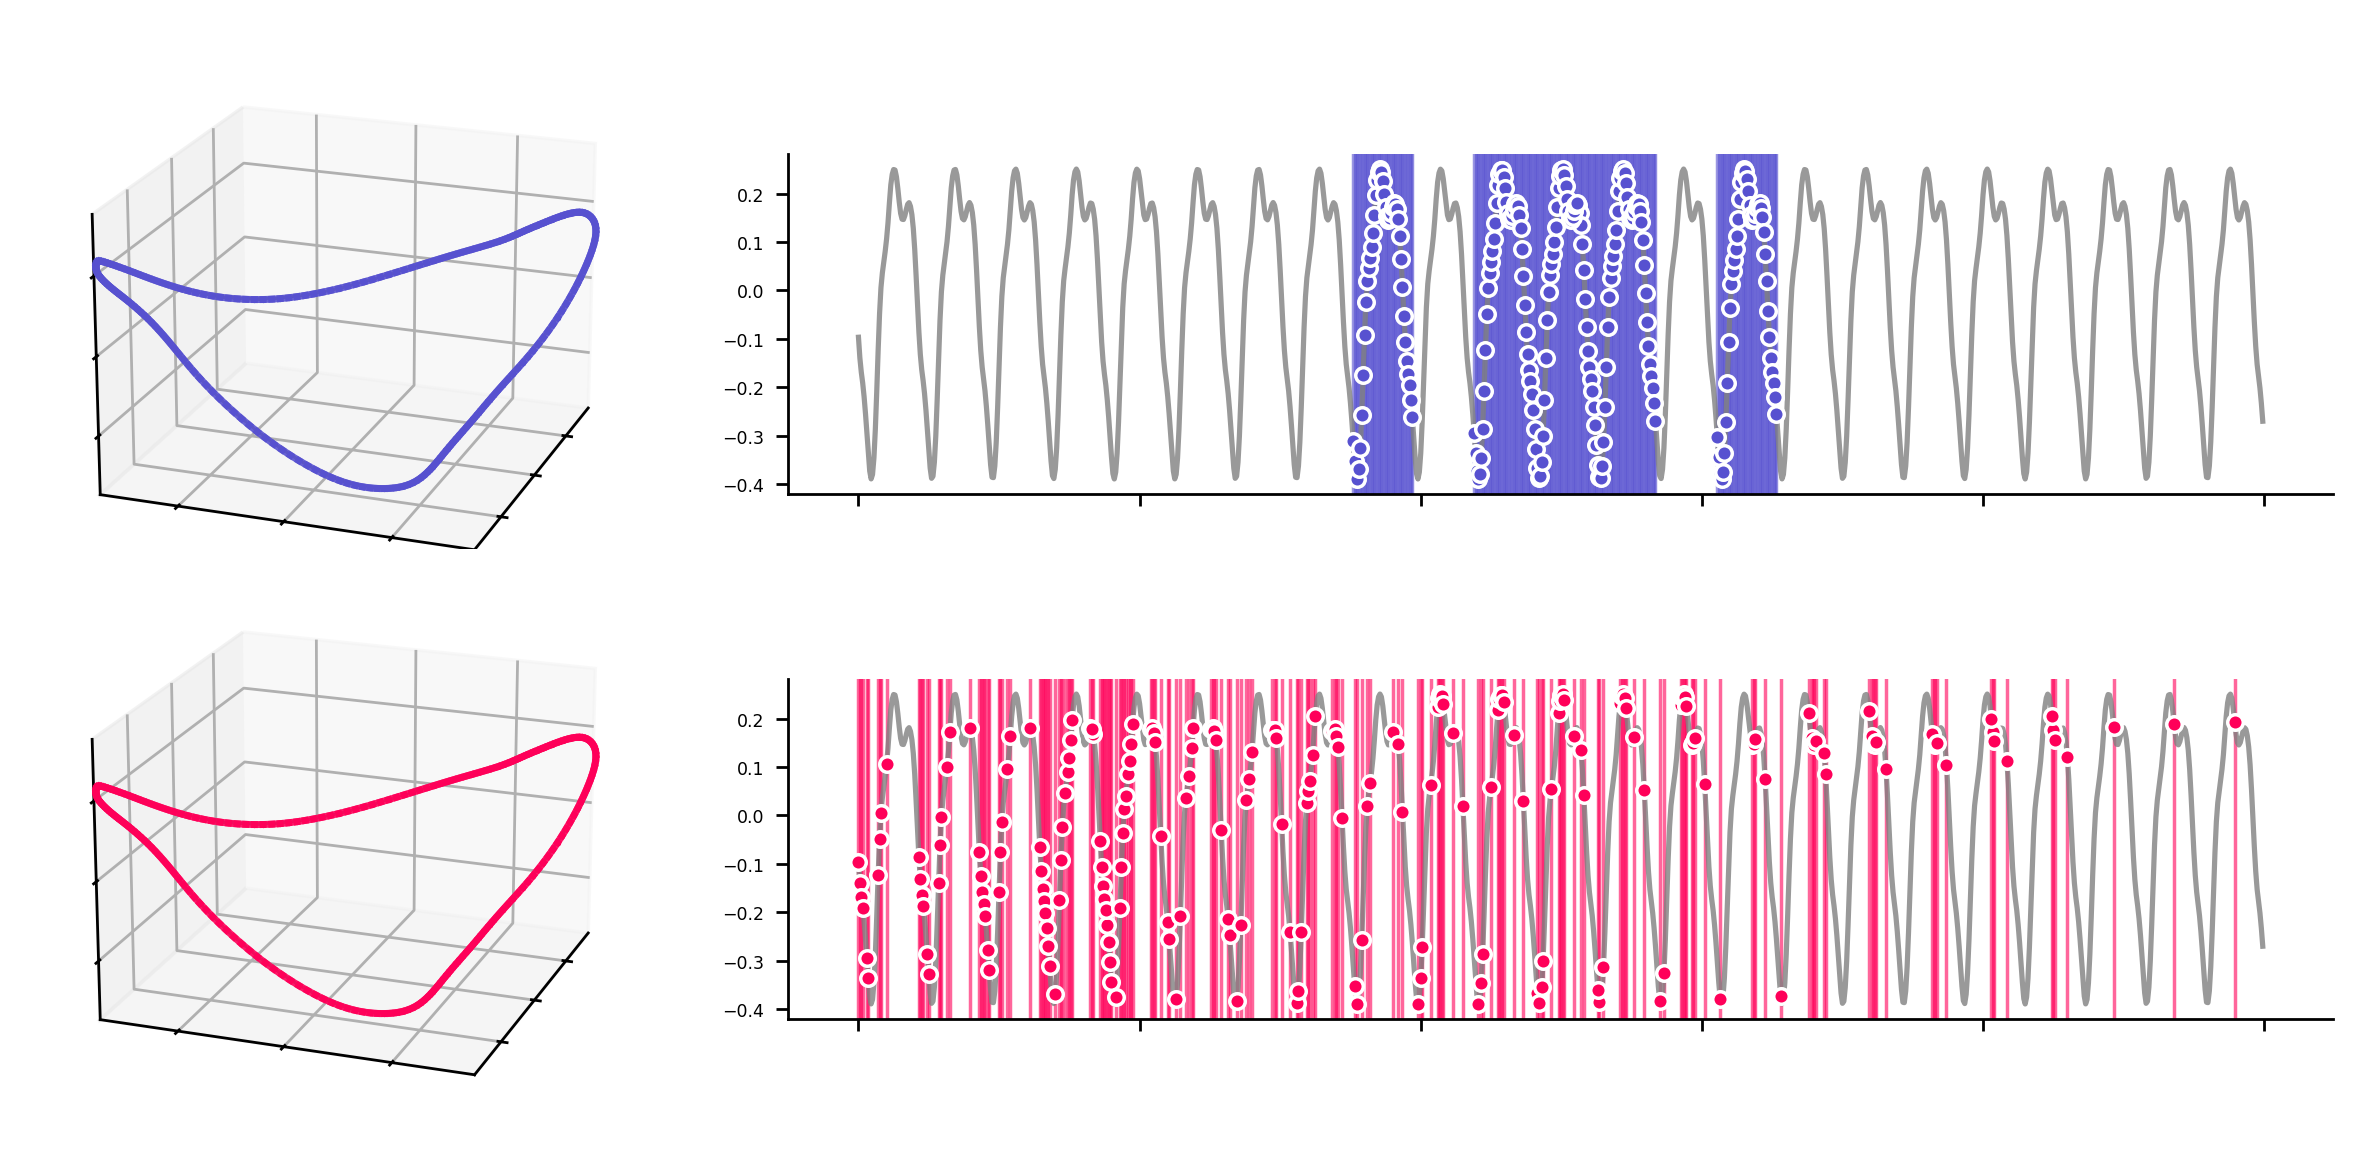

In [40]:
# Create 3D subplots
fig = plt.figure(figsize=(9.5, 4.5), dpi=250)

# Adjusting the grid specification
gs = fig.add_gridspec(
    6, 2, 
    height_ratios=[0.6,1,0.6,0.6,1,0.6],  # Equal height for both rows
    width_ratios=[0.5, 1],  # Wider right column, smaller left column
    wspace=0.05,  # Slight space between columns (you can adjust this)
    hspace=-0.3   # Space between rows (adjust to your preference)
)

# Embedding plot (3D plot on the left)
ax_A = fig.add_subplot(gs[:3, 0], projection='3d')
higher_embedding_plot(points, ax_A,cycles=[mean_cycle],cmap=["purple"],view=(20,20))
#ax_A.text2D(0.05, 0.87, 'A', transform=ax_A.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")

ax_B = fig.add_subplot(gs[3:, 0], projection='3d')
higher_embedding_plot(points, ax_B, cycles=[local_cycle],cmap=["red"],view=(20,20))
#ax_B.text2D(0.05, 0.87, 'B', transform=ax_B.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")


ax = fig.add_subplot(gs[0, 1])
ax.axis("off")
ax = fig.add_subplot(gs[2, 1])
ax.axis("off")
ax = fig.add_subplot(gs[3, 1])
ax.axis("off")
ax = fig.add_subplot(gs[5, 1])
ax.axis("off")


# Example 1: First plot on the top right
ax = fig.add_subplot(gs[1, 1])
plot_selection(x[:50000][::50],fx[:50000][::50],mean_cycle,colors["purple"],ax)
#ax.text(0.01, 1, 'B', transform=ax.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")
# Example 2: Second plot on the bottom right
ax = fig.add_subplot(gs[4, 1])
plot_selection(x[:50000][::50],fx[:50000][::50],local_cycle,colors["red"],ax)
#ax.text(0.01, 1, 'C', transform=ax.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("Figures/example_enso165_representatives_full_clean.png",bbox_inches='tight')
plt.show()

# constrained

In [14]:
max_edge_length = death * 1.01  # give a bit of slack
boundary_matrix,x_orig,n_simplices,_,_ = boundary_and_representative(points,
                                                                     max_edge_length,
                                                                     slack_factor=0.9)

In [15]:
W_local = local_time_difference(n_simplices)
cons_local_cycle = optimize_cycle(W_local, x_orig, boundary_matrix, n_simplices)
W_mean = re.core.create_weight_matrix(n_simplices, time_adjacency_matrix(np.mean))
cons_mean_cycle = optimize_cycle(W_mean, x_orig, boundary_matrix, n_simplices)

Set parameter Username
Set parameter LogFile to value "gurobi.log"
Using license file /Users/antonio/gurobi.lic
Academic license - for non-commercial use only - expires 2025-10-30

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.1.0 24B91)
Copyright (c) 2024, Gurobi Optimization, LLC

Read LP format model from file /var/folders/n0/wk41mth910n6jkj_vdp1m4z00000gn/T/5cd8f2ee197049278eaccfd4e25e82bd-pulp.lp
Reading time = 0.06 seconds
OBJ: 24666 rows, 72998 columns, 120330 nonzeros

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 24666 rows, 72998 columns and 120330 nonzeros
Model fingerprint: 0x65476bec
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 21449 rows and 21449 columns
Presolve time: 0.06s
Presolved: 3217 rows, 51549 columns, 104842 nonzeros

Concurrent 

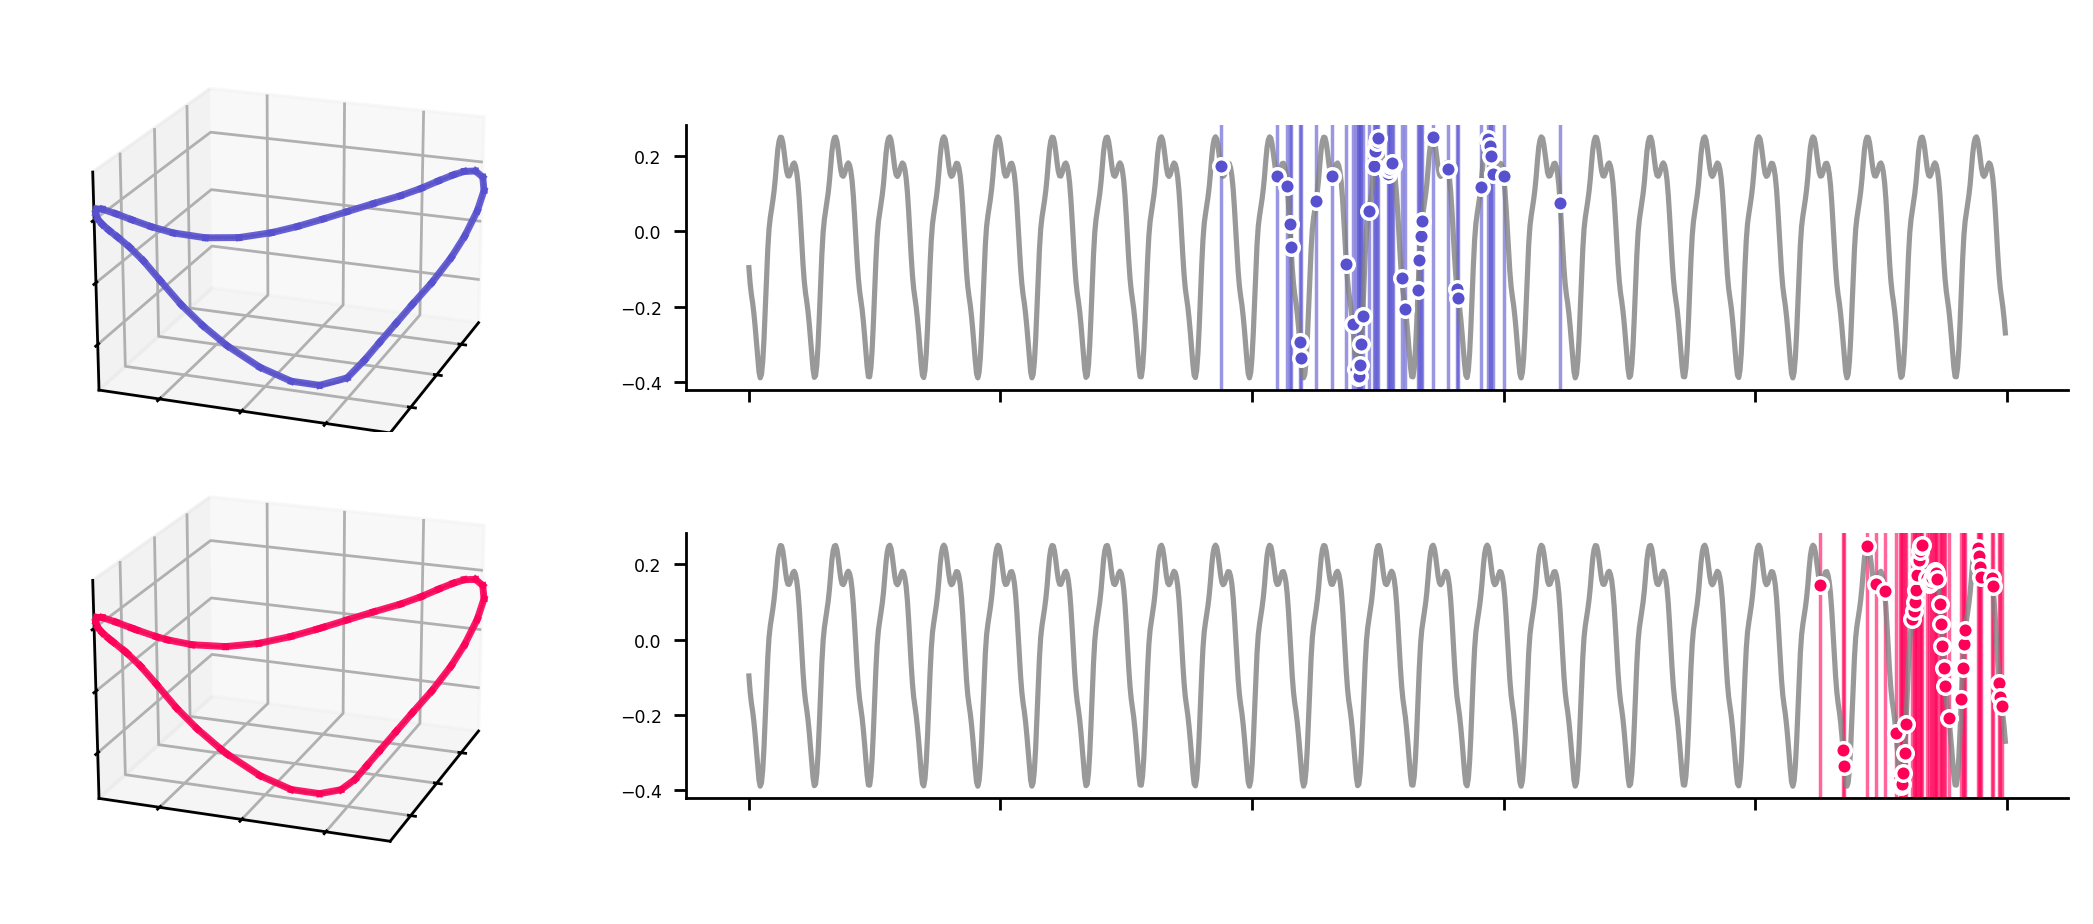

In [39]:
# Create 3D subplots
fig = plt.figure(figsize=(8.5, 3.5), dpi=250)

# Adjusting the grid specification
gs = fig.add_gridspec(
    6, 2, 
    height_ratios=[0.6,1,0.6,0.6,1,0.6],  # Equal height for both rows
    width_ratios=[0.5, 1],  # Wider right column, smaller left column
    wspace=0.05,  # Slight space between columns (you can adjust this)
    hspace=-0.3   # Space between rows (adjust to your preference)
)

# Embedding plot (3D plot on the left)
ax_A = fig.add_subplot(gs[:3, 0], projection='3d')
higher_embedding_plot(points, ax_A,cycles=[cons_mean_cycle],cmap=["purple"],view=(20,20))
#ax_A.text2D(0.05, 0.87, 'A', transform=ax_A.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")

ax_B = fig.add_subplot(gs[3:, 0], projection='3d')
higher_embedding_plot(points, ax_B, cycles=[cons_local_cycle],cmap=["red"],view=(20,20))
#ax_B.text2D(0.05, 0.87, 'B', transform=ax_B.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")


ax = fig.add_subplot(gs[0, 1])
ax.axis("off")
ax = fig.add_subplot(gs[2, 1])
ax.axis("off")
ax = fig.add_subplot(gs[3, 1])
ax.axis("off")
ax = fig.add_subplot(gs[5, 1])
ax.axis("off")


# Example 1: First plot on the top right
ax = fig.add_subplot(gs[1, 1])
plot_selection(x[:50000][::50],fx[:50000][::50],cons_mean_cycle,colors["purple"],ax)
#ax.text(0.01, 1, 'B', transform=ax.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")
# Example 2: Second plot on the bottom right
ax = fig.add_subplot(gs[4, 1])
plot_selection(x[:50000][::50],fx[:50000][::50],cons_local_cycle,colors["red"],ax)
#ax.text(0.01, 1, 'C', transform=ax.transAxes, fontsize=12, va='top', ha='left', fontweight="bold")
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig("Figures/example_enso165_representatives_90.png",bbox_inches='tight')
plt.show()